# Supervised Learning - Foundations Project: ReCell

## Problem Statement

**Business Context**

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


**Objective**

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


**Data Description**

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Mount, Import and Load

We will start this project by uploading all of the needed files into MyDrive.  From there we will need to mount MyDrive, load the files and import the needed libraries.  

In [2]:
#Mounts drive, to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# For Dataframes and data
import pandas as pd
import numpy as np

# For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm
from scipy import stats

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [35]:
#Load data and read first 5 rows
df = pd.read_csv('/content/drive/MyDrive/Great Learning/3 Supervised Learning - Foundation/Week 3: ReCell Project/used_device_data.csv')
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

The goal of this section is to just get an idea of what type of data we have, if there are missing values, and look at the statistics for first insights.

In [5]:
# Check for null data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
#Give a statistical summary for quantitative data
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [7]:
#Shows the number of rows and columns
df_shape = df.shape
print(df_shape)

(3454, 15)


**Observations:**

* We can see that there are 4 object data types that will need to be dealt with.
* We can see that there are missing values in multible columns

## Exploratory Data Analysis (EDA)

The goal of the EDA is to get a better understanding for our data that will lead to better feature engineering.  It will also help give us insight to potential problems in the linear regression assumetion and ideas on how to fix them.  

Below are the questions provided with their answers.

**Questions:**


1. What does the distribution of normalized used device prices look like?

Here we created a histogram to show the distribution of normalized_used_price.  We can see that it is approximately normal, but does have a slight left skew.  

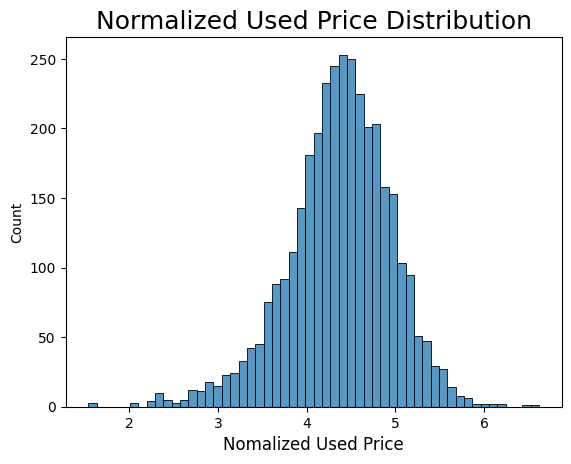

In [8]:
# Histogram plot of the normalized_used_price
sns.histplot(data = df, x = 'normalized_used_price')

# Adds title and labels
plt.title('Normalized Used Price Distribution', fontsize = 18)
plt.xlabel('Nomalized Used Price', fontsize = 12);

2. What percentage of the used device market is dominated by Android devices?

Here we filterd the data for where the `os` was Android, and then compared that the count of all of our data.  We have that 93.1% of all used phones in our data run on Android.

In [9]:
# Calculates % of Android phones
percent_android = round(len(df[df['os'] == 'Android'])/df_shape[0]*100,3)

# Prints answer
print(f"{percent_android}% of the used phone market runs on an Android operating system.")

93.052% of the used phone market runs on an Android operating system.


3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

To compare RAM by brand, we created a lineplot with the median RAM value for each brand.  As we can see the vast majorty of the brands have a Medain RAM value of 4GB.

In fact 81.5% of all phones in our data have 4GB of RAM.

The function below allows the user to input the name of any brand and see a count plot for individual brands.  

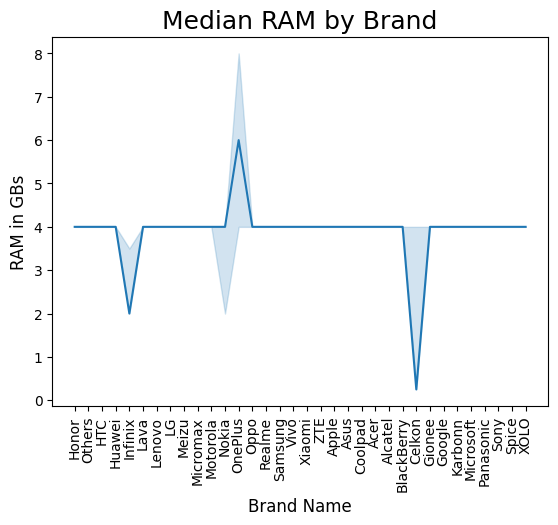

In [10]:
#Creates line plot to show the median RAM for each brand
sns.lineplot(data = df, x = 'brand_name', y = 'ram', estimator = 'median')

#Formats Lineplot
plt.title('Median RAM by Brand', fontsize = 18)
plt.xlabel('Brand Name', fontsize = 12)
plt.ylabel('RAM in GBs', fontsize = 12)
plt.xticks(rotation = 90);


In [11]:
#Prints the percentage of phones with 4GB of RAM
print(f"{round(len(df[df['ram'] == 4])/df_shape[0]*100, 3)}% of phones have 4GB of RAM")

81.5% of phones have 4GB of RAM


Enter a brand name from this list:
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
OnePlus


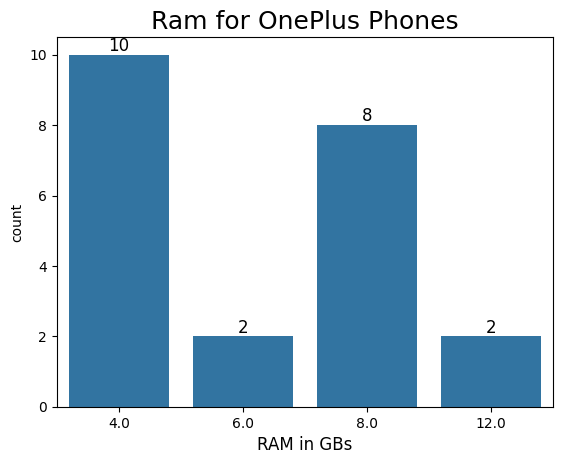

In [12]:
def RAM_for_brand():
  #Creates a str that includes all of the brands in our data set
  brands = str(df.brand_name.unique())

  #Prompts the user to input a brand
  input_brand = input('Enter a brand name from this list:\n' + brands + '\n')

  #Creates a bar plot for the RAM for the brand inputted above
  ram_by_brand = sns.countplot(data = df[df.brand_name == input_brand], x = 'ram')
  plt.title(f"Ram for {input_brand} Phones", fontsize = 18)
  plt.xlabel('RAM in GBs', fontsize = 12);

  #Labels the bars with their counts
  for bar in ram_by_brand.containers:
    ram_by_brand.bar_label(bar, fontsize = 12)

RAM_for_brand()

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?


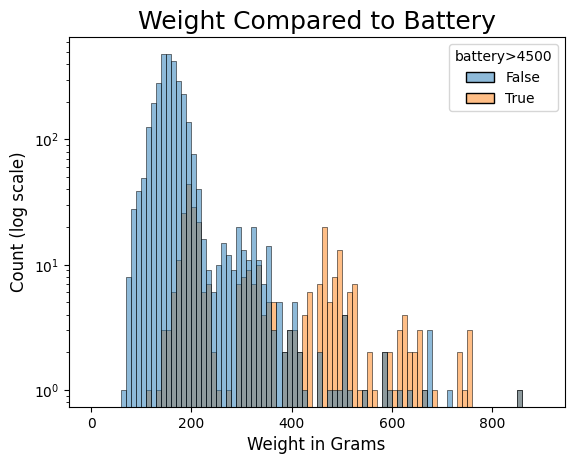

In [13]:
#Creates a creates a boolean variable to determine when the battery is over 4,500 mAh
df['battery>4500'] = df.battery > 4500

#creates a histogram to compare weight
sns.histplot(data = df, x = 'weight', hue = 'battery>4500', binwidth = 10, binrange = (0, 900))
plt.yscale('log')

#Formats the histogram
plt.title('Weight Compared to Battery', fontsize=18)
plt.xlabel('Weight in Grams', fontsize = 12)
plt.ylabel('Count (log scale)', fontsize = 12);

In [14]:
#Drops our added column
df.drop('battery>4500', axis = 1, inplace = True)

We can see that there are a lot more phones with batteries less than 4500 mAh. The phones with batteries larger than 4500 mAh tend to be heavier.  The distribution of weight for the phones with batteries less than 4500 mAh have a strong right skew.  

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?


The `screen_size` column is measured in cm.  Since 6 inches is 15.24 cm.

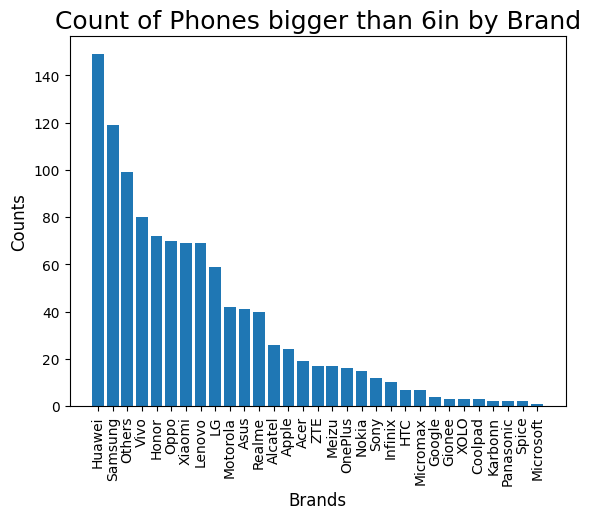

In [15]:
#Filters to phones with screen size bigger than 15.24cm, which is 6 inches.  Than counts the totals and sorts
df_screen = df[df.screen_size > 15.24].groupby('brand_name')['screen_size'].count().sort_values(ascending = False)

#Creates a bar plot to show results
plt.bar(df_screen.index, df_screen.values)

#Formats bar plot
plt.title('Count of Phones bigger than 6in by Brand', fontsize =18)
plt.xlabel('Brands', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.xticks(rotation=90);


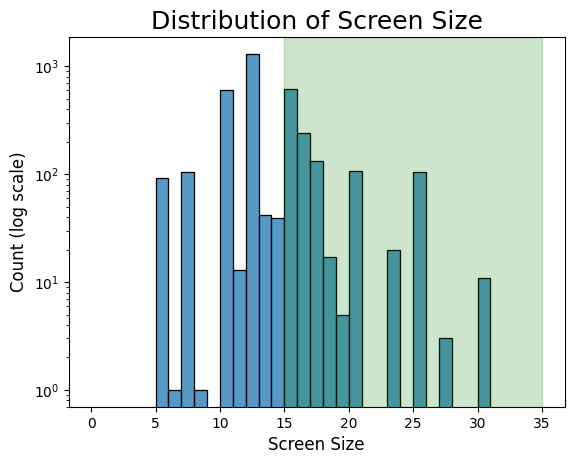

In [16]:
#Creates a scatter plot for the distribution of screen size
sns.histplot(data = df, x = 'screen_size', binwidth = 1, binrange = (0, 35))
plt.yscale('log')

#Formats Scatter plot
plt.title('Distribution of Screen Size', fontsize = 18)
plt.xlabel('Screen Size', fontsize = 12)
plt.ylabel('Count (log scale)', fontsize = 12)

#Highlights the cameras with a screen size bigger than 15
plt.axvspan(15, 35, color = 'green', alpha = 0.2);

Since 6 inches is 15.24 cm, we made a count of all phones that are over 15.24cm by brand.  We also made a histogram plot that show all phones.

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

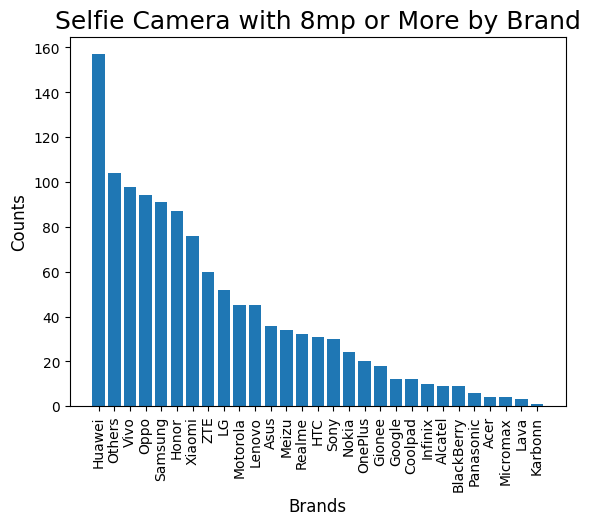

In [17]:
#Filters for selfie cameras with 8 or more mp. Than counts and sorts.
df_selfie = df[df.selfie_camera_mp >= 8].groupby('brand_name')['selfie_camera_mp'].count().sort_values(ascending = False)

#Creates a bar plot to show results
plt.bar(df_selfie.index, df_selfie.values)

#Formats bar plot
plt.title('Selfie Camera with 8mp or More by Brand', fontsize =18)
plt.xlabel('Brands', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.xticks(rotation=90);

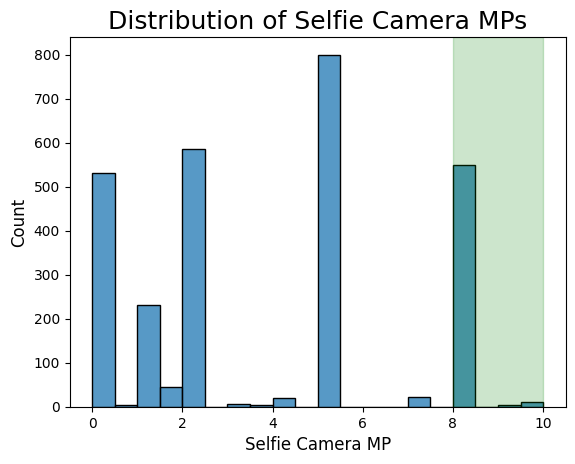

In [18]:
#Creates Histogram
sns.histplot(data = df, x = 'selfie_camera_mp', binwidth = 0.5, binrange = (0,10))

#Formats Histogram
plt.title('Distribution of Selfie Camera MPs', fontsize = 18)
plt.xlabel('Selfie Camera MP', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

#Adds shaded target area
plt.axvspan(8, 10, color = 'green', alpha = 0.2);

We can see that there most of the phones have less than 8 MPs on thier selfie camera.  We can see in the list above exactly how many are available for each brand.

7. Which attributes are highly correlated with the normalized price of a used device?

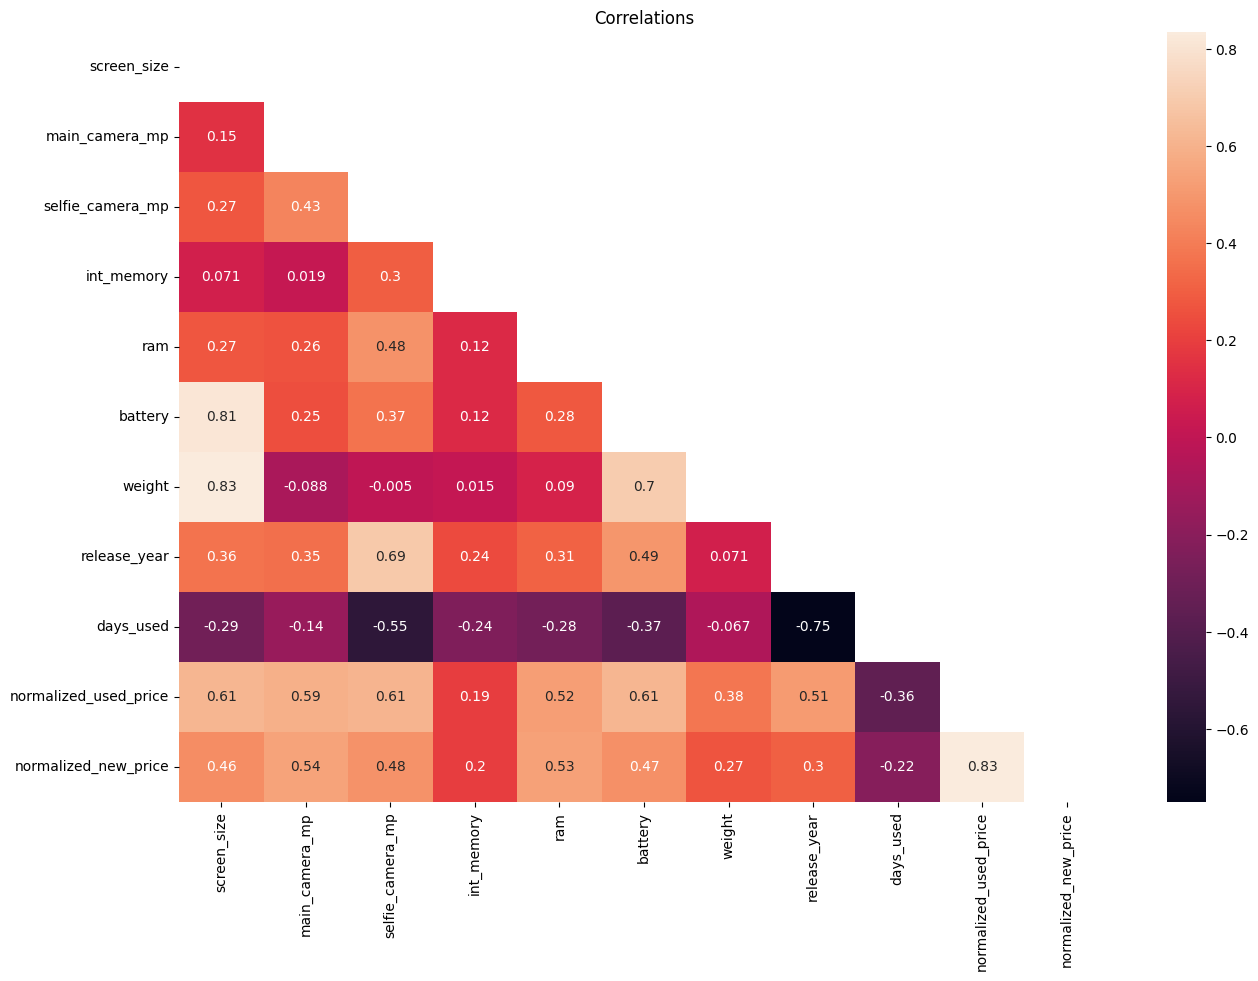

In [19]:
#Sets figue size
plt.figure(figsize = (15,10))

#Creates a matrix of correlations
correlations = df.corr(numeric_only=True)

#Graphs the correlations on a heatmap
correlationMap = sns.heatmap(
    correlations,
    annot=True,
    mask=np.triu(correlations)
      )

correlationMap.set_title('Correlations');


We can see that the highest correlation exist between the normalized new price and normalized used price (0.83).  RAM and the main camera's mp are the only other variables with a correlation above 0.5.  Screen size, the selfie camera and battery all have correlations near 0.5.

## Data Preprocessing

### Missing value treatment


In [20]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

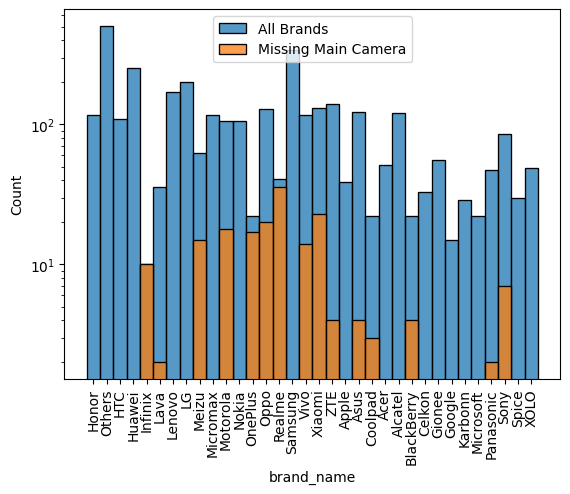

In [21]:
#Creats a histogram for brand_name and highlights the ones missing main_camera_mp
sns.histplot(data = df, x = 'brand_name')
sns.histplot(data = df[df.main_camera_mp.isnull()], x = 'brand_name')

#Sets the y-axis to a log scale
plt.yscale('log')

#Formats graph
plt.xticks(rotation = 90);
plt.legend(labels=['All Brands', 'Missing Main Camera'], loc='upper center');

In [36]:
df.fillna(df.median(numeric_only= True), inplace = True)
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Observarions:** There were 179 null values for main camera mp.  This is a lot more than all of the other columns.  We should investigate why there are so many null columns here.  There are some brands with the majority of the values are null, so we can not impute by brand.  Instead we just added the median value to replace all null values.

### Feature engineering (if needed)


We are going to start by making a copy of df to apply our feature engineering to.

In [37]:
#Creates a copy of df
df_E = df.copy()
df_E.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


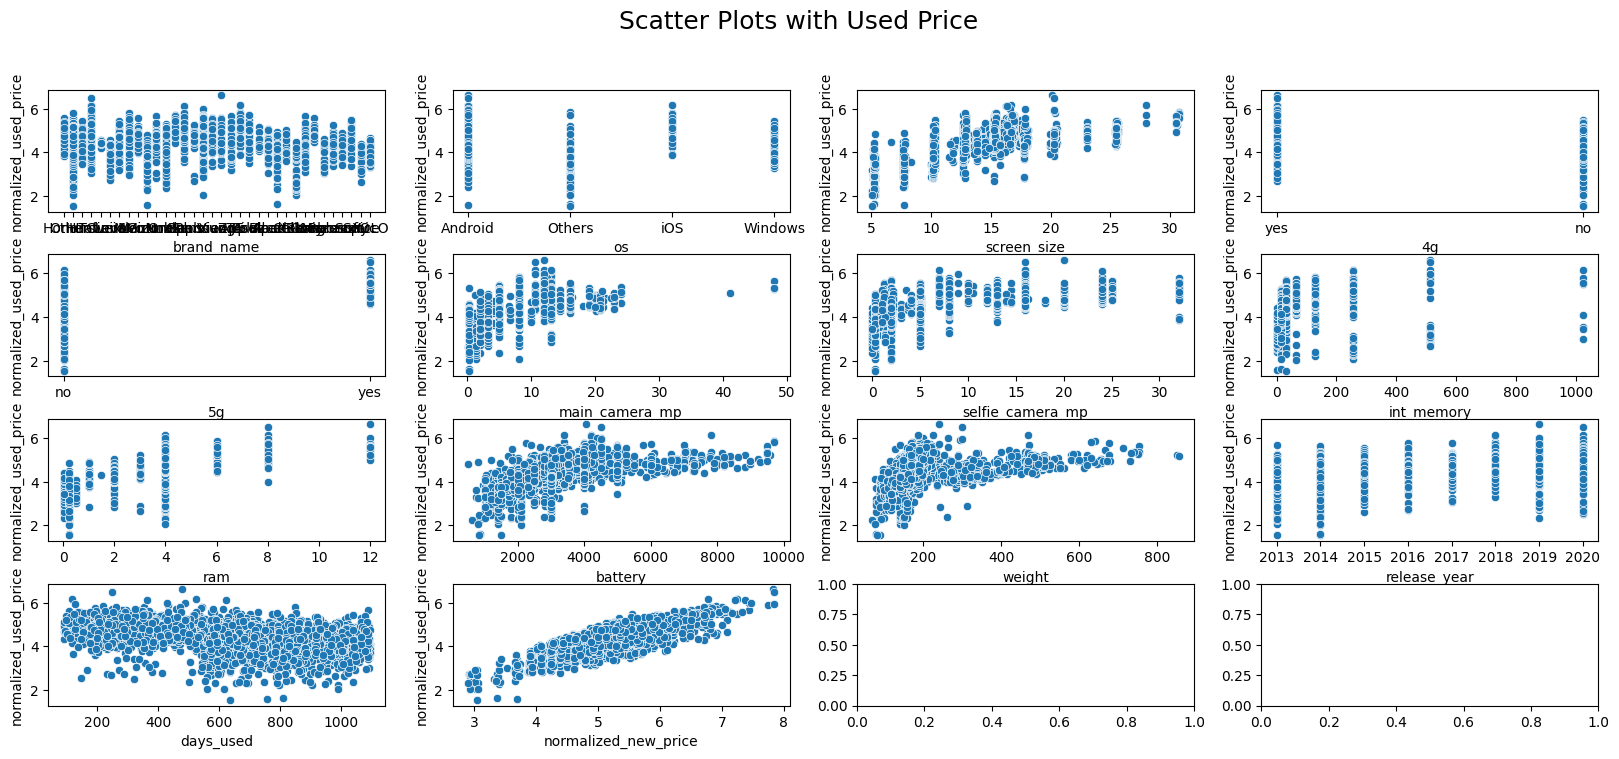

In [38]:
#Sets up the figure
fig_scat, axs_scat = plt.subplots(4,4)

#Adjust size and spacing of the figure
fig_scat.set_figwidth(20)
fig_scat.set_figheight(8)
plt.subplots_adjust(hspace = 0.35)

#Creates each plot
sns.scatterplot(data = df_E, x = 'brand_name',    y = 'normalized_used_price', ax = axs_scat[0,0])
sns.scatterplot(data = df_E, x = 'os',      y = 'normalized_used_price', ax = axs_scat[0,1])
sns.scatterplot(data = df_E, x = 'screen_size',   y = 'normalized_used_price', ax = axs_scat[0,2])
sns.scatterplot(data = df_E, x = '4g',    y = 'normalized_used_price', ax = axs_scat[0,3])
sns.scatterplot(data = df_E, x = '5g',      y = 'normalized_used_price', ax = axs_scat[1,0])
sns.scatterplot(data = df_E, x = 'main_camera_mp',      y = 'normalized_used_price', ax = axs_scat[1,1])
sns.scatterplot(data = df_E, x = 'selfie_camera_mp',     y = 'normalized_used_price', ax = axs_scat[1,2])
sns.scatterplot(data = df_E, x = 'int_memory',     y = 'normalized_used_price', ax = axs_scat[1,3])
sns.scatterplot(data = df_E, x = 'ram',     y = 'normalized_used_price', ax = axs_scat[2,0])
sns.scatterplot(data = df_E, x = 'battery',     y = 'normalized_used_price', ax = axs_scat[2,1])
sns.scatterplot(data = df_E, x = 'weight', y = 'normalized_used_price', ax = axs_scat[2,2])
sns.scatterplot(data = df_E, x = 'release_year',   y = 'normalized_used_price', ax = axs_scat[2,3])
sns.scatterplot(data = df_E, x = 'days_used',   y = 'normalized_used_price', ax = axs_scat[3,0])
sns.scatterplot(data = df_E, x = 'normalized_new_price',   y = 'normalized_used_price', ax = axs_scat[3,1])


#Titles figure
fig_scat.suptitle('Scatter Plots with Used Price', fontsize = 18);

Things to do:
1. Ordinal Encode Brand Name
2. Dummie variables for OS, 4g, and 5g
3. Look into linearlizing main_camera_mp, selfie_camera_mp and weight

#### Ordinal Encoding Brand Name

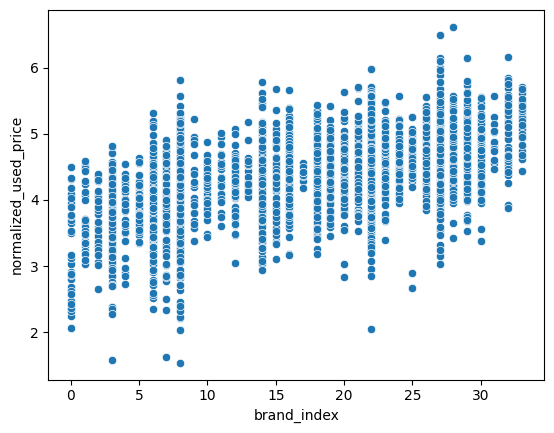

In [39]:
#Ecodes the Brands by the order of their median value for normalized_used_price

#Creates the ordered list of brands
ordered_brands = list(df_E.groupby('brand_name')['normalized_used_price'].median().sort_values().index)

#Empty list to fill
brand_index = []

#Loops each row of df_E and adds brands index to list
for brand in df_E.brand_name:
  brand_index.append(ordered_brands.index(brand))

#Adds list to df_E and plots
df_E['brand_index'] = brand_index
sns.scatterplot(data= df_E, x = 'brand_index', y = 'normalized_used_price')

#Drops brand_name
df_E.drop('brand_name', axis = 1, inplace = True)

#### Dummie variables for OS, 4g, and 5g

I learned about the OneHotEncoder from Kaggle.  I decided to use it to create the dummy variables of 4g, 5g and os.  

In [40]:
#Defines OneHotEncoder
encoder = OneHotEncoder(drop = 'first', sparse_output = False)

#Fits and used the encoder to transform data
df_E[['4g', '5g', 'Other', 'iOS', 'Windows']] = encoder.fit_transform(df[['4g', '5g', 'os']])
df_E.drop('os', axis = 1, inplace = True)

#Check to make sure this worked correctly
df_E.head()




,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,brand_index,Other,iOS,Windows
0,14.50,1.0,0.0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,26,0.0,0.0,0.0
1,17.30,1.0,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,26,0.0,0.0,0.0
2,16.69,1.0,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,26,0.0,0.0,0.0
3,25.50,1.0,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,26,0.0,0.0,0.0
4,15.32,1.0,0.0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,26,0.0,0.0,0.0


####Look into linearlizing main_camera_mp, selfie_camera_mp and weight

For each of the cells below, I tested a few different transformations and selected the best one I found.

In [ ]:
#4th root transformation and drop the orginal column
df_E['main_camera_mp_4throot'] = (df.main_camera_mp)**(1/4)
df_E.drop('main_camera_mp', axis = 1, inplace = True)

#Creates a scatter plot
sns.scatterplot(data=df_E, x= 'main_camera_mp_4throot', y = 'normalized_used_price');

In [ ]:
# 4th root transformation and drops the orginal column
df_E['selfie_camera_mp_4throot'] = df.selfie_camera_mp**(1/4)
df_E.drop('selfie_camera_mp', axis = 1, inplace = True)

#Creates a scatterplot
sns.scatterplot(data=df_E, x= 'selfie_camera_mp_4throot', y = 'normalized_used_price');

In [ ]:
#sns.scatterplot(data = df, x = 'weight', y = 'normalized_used_price')
df_E['weight_log'] = np.log(df.weight)

weight_tran = []
for point in df_E.weight_log:
  if point > 5.5:
    weight_tran.append(point-1)
  else:
    weight_tran.append(point)

df_E['weight_trans'] = weight_tran

sns.scatterplot(data = df_E, x = 'weight_trans', y = 'normalized_used_price')

df_E.drop(['weight', 'weight_log'], axis = 1, inplace = True)


In [ ]:
#Log transformation and drop orginal column
df_E['int_memory_log'] = np.log(df.int_memory)
df_E.drop('int_memory', axis = 1, inplace = True)

#Creates a Scatter plot
sns.scatterplot(data=df_E, x='int_memory_log', y='normalized_used_price');

In [ ]:
#Log transformation and drop orginal column
df_E['ram_root'] = df_E.ram**(1/1.4)
df_E.drop('ram', axis = 1, inplace = True)

#Creates a Scatter plot
sns.scatterplot(data=df_E, x='ram_root', y='normalized_used_price');

### Outlier detection and treatment (if needed)


I checked the RLM and cov_type = HC0 which would be methods of making the model more robust to outliers.  Neither of these had a large impact on the model and since there are not any clear outliers in the engineered scatter plots below, we do not need to treat for outliers.

### Preparing data for modeling


In [44]:
#Creates X and y with all of the data
X = df_E.drop('normalized_used_price', axis = 1)
y = df_E.normalized_used_price

#Adds a constant to X for the intercept
X = sm.add_constant(X)

#Splits data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Any other preprocessing steps (if needed)

## EDA

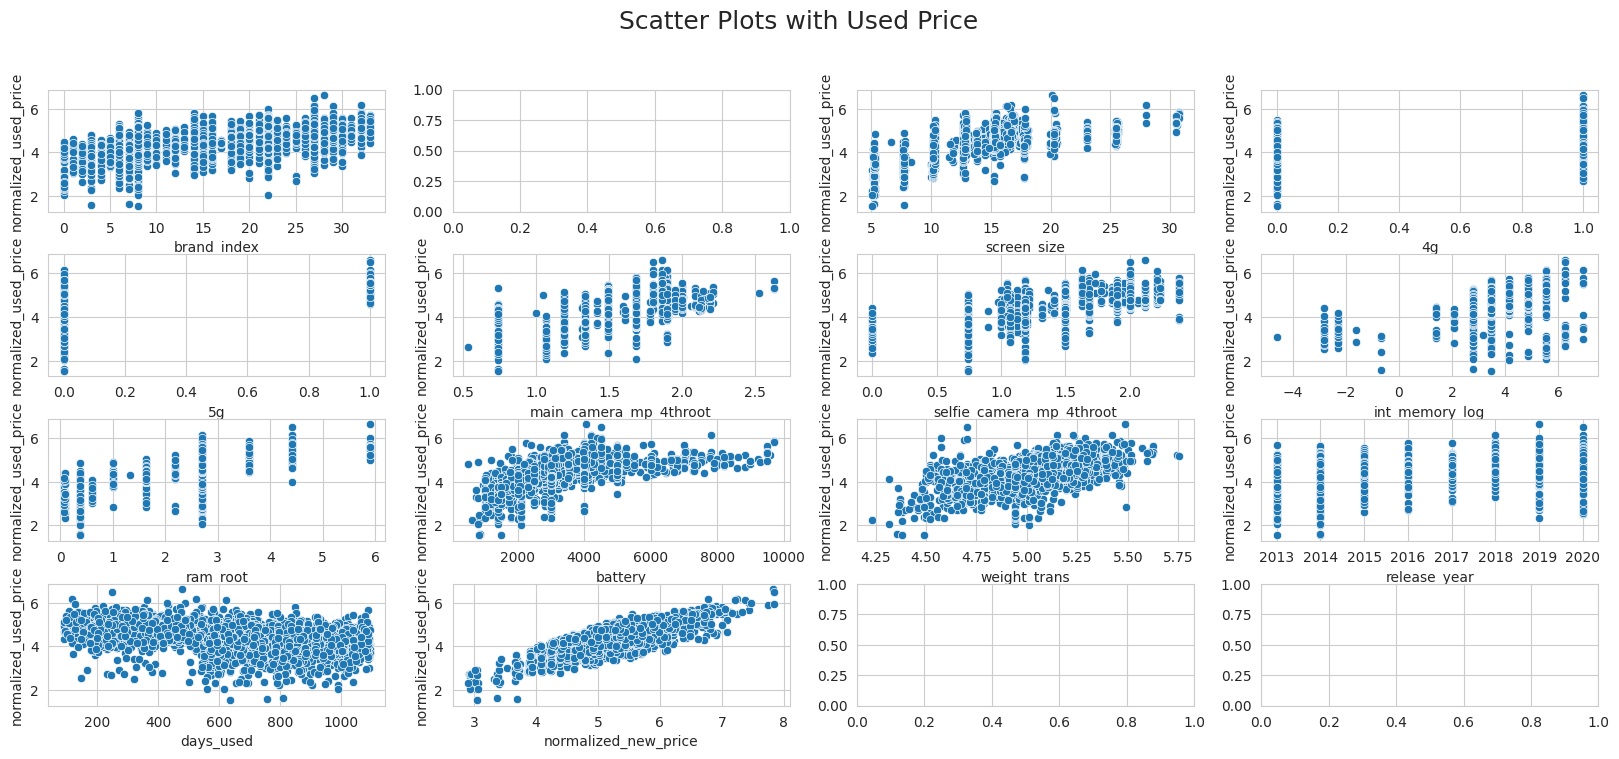

In [ ]:
#Sets up the figure
fig_scat, axs_scat = plt.subplots(4,4)

#Adjust size and spacing of the figure
fig_scat.set_figwidth(20)
fig_scat.set_figheight(8)
plt.subplots_adjust(hspace = 0.35)

#Creates each plot
sns.scatterplot(data = df_E, x = 'brand_index',    y = 'normalized_used_price', ax = axs_scat[0,0])
sns.scatterplot(data = df_E, x = 'screen_size',   y = 'normalized_used_price', ax = axs_scat[0,2])
sns.scatterplot(data = df_E, x = '4g',    y = 'normalized_used_price', ax = axs_scat[0,3])
sns.scatterplot(data = df_E, x = '5g',      y = 'normalized_used_price', ax = axs_scat[1,0])
sns.scatterplot(data = df_E, x = 'main_camera_mp_4throot',      y = 'normalized_used_price', ax = axs_scat[1,1])
sns.scatterplot(data = df_E, x = 'selfie_camera_mp_4throot',     y = 'normalized_used_price', ax = axs_scat[1,2])
sns.scatterplot(data = df_E, x = 'int_memory_log',     y = 'normalized_used_price', ax = axs_scat[1,3])
sns.scatterplot(data = df_E, x = 'ram_root',     y = 'normalized_used_price', ax = axs_scat[2,0])
sns.scatterplot(data = df_E, x = 'battery',     y = 'normalized_used_price', ax = axs_scat[2,1])
sns.scatterplot(data = df_E, x = 'weight_trans', y = 'normalized_used_price', ax = axs_scat[2,2])
sns.scatterplot(data = df_E, x = 'release_year',   y = 'normalized_used_price', ax = axs_scat[2,3])
sns.scatterplot(data = df_E, x = 'days_used',   y = 'normalized_used_price', ax = axs_scat[3,0])
sns.scatterplot(data = df_E, x = 'normalized_new_price',   y = 'normalized_used_price', ax = axs_scat[3,1])


#Titles figure
fig_scat.suptitle('Scatter Plots with Used Price', fontsize = 18);

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     3454 non-null   float64
 1   screen_size               3454 non-null   float64
 2   4g                        3454 non-null   float64
 3   5g                        3454 non-null   float64
 4   battery                   3454 non-null   float64
 5   release_year              3454 non-null   int64  
 6   days_used                 3454 non-null   int64  
 7   normalized_new_price      3454 non-null   float64
 8   brand_index               3454 non-null   int64  
 9   Other                     3454 non-null   float64
 10  iOS                       3454 non-null   float64
 11  Windows                   3454 non-null   float64
 12  main_camera_mp_4throot    3454 non-null   float64
 13  selfie_camera_mp_4throot  3454 non-null   float64
 14  weight_t

## Model Building - Linear Regression

This is our first model.  We will start by calculating the VIF scores of each variable and test each column with a VIF over 5.  

In [45]:
#Creates Model
linear_model0 = sm.OLS(y_train, X_train)

#Trains Model
linear_model0 = linear_model0.fit()

#Prints Summary
print(linear_model0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     794.6
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                           19:29:15   Log-Likelihood:                 95.543
No. Observations:                   2417   AIC:                            -157.1
Df Residuals:                       2400   BIC:                            -58.65
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [46]:
#Creates Series of VIF scores
vif_series0 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

#prints VIF scores
print("VIF values: \n\n{}\n".format(vif_series0))

VIF values: 

const                   3.570678e+06
screen_size             7.285412e+00
4g                      2.314160e+00
5g                      1.762911e+00
main_camera_mp          1.926971e+00
selfie_camera_mp        2.599602e+00
int_memory              1.247702e+00
ram                     2.109646e+00
battery                 3.865794e+00
weight                  6.155748e+00
release_year            4.613122e+00
days_used               2.591315e+00
normalized_new_price    2.706712e+00
brand_index             1.588556e+00
Other                   1.475351e+00
iOS                     1.029692e+00
Windows                 1.120819e+00
dtype: float64



The root mean squared error is: 0.23685405092012368.


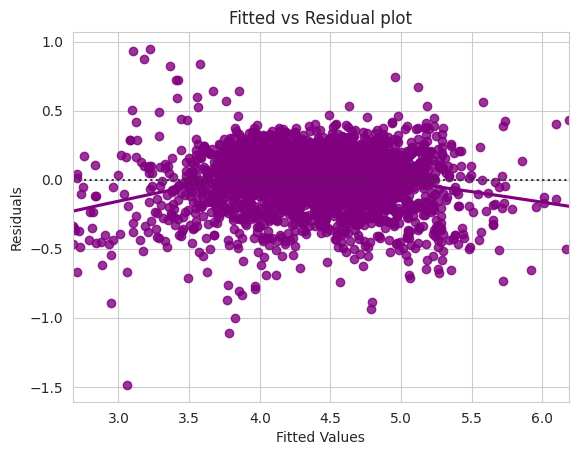

In [47]:
#Makes predictions with linear_model
y_pred = linear_model0.predict(X_test)

#Creates data frame to hold value, predicted values and error
df_pred = pd.DataFrame()

#Fills data frame
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = linear_model0.fittedvalues.values  # predicted values
df_pred["Residuals"] = linear_model0.resid.values  # residuals

# plots the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)

#Formats plot
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")

#Checks the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"The root mean squared error is: {rmse}.")

Now we are going to eliminate variables with insignificant coefficients. We will do this one at a time, testing the model each time.  We will elminate the variable with the highest p-value and then refit the model

In [ ]:
#Creates X and y with all of the data
X = df_E.drop(['normalized_used_price', 'battery', '4g', 'brand_index', 'iOS', 'int_memory_log', 'days_used', '5g', 'Windows'], axis = 1)
y = df_E.normalized_used_price

#Adds a constant to X for the intercept
X = sm.add_constant(X)

#Splits data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

linear_model1 = sm.OLS(y_train, X_train)
linear_model1 = linear_model1.fit()

print(linear_model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1507.
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           12:32:54   Log-Likelihood:                 38.130
No. Observations:                   2417   AIC:                            -58.26
Df Residuals:                       2408   BIC:                            -6.146
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

The root mean squared error is: 0.23827189923368194.


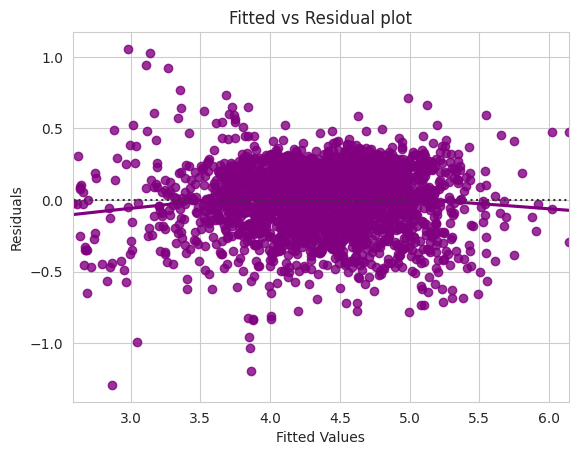

In [ ]:
#Makes predictions with linear_model
y_pred = linear_model1.predict(X_test)

#Creates data frame to hold value, predicted values and error
df_pred = pd.DataFrame()

#Fills data frame
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = linear_model1.fittedvalues.values  # predicted values
df_pred["Residuals"] = linear_model1.resid.values  # residuals

# plots the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)

#Formats plot
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")

rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"The root mean squared error is: {rmse}.")

## Model Performance Check

In [ ]:
#Make prediction on training and test data
y_train_pred = linear_model1.predict(X_train)
y_test_pred = linear_model1.predict(X_test)

#Calculate the root mean square error
trained_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)

#Print Results
print(f"The root mean squared error for the trained data is: {trained_rmse}.")
print(f"The root mean squared error for the test data is: {test_rmse}")

The root mean squared error for the trained data is: 0.23818345511357836.
The root mean squared error for the test data is: 0.23827189923368194


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

For Linear Regression, we need to check if the following assumptions hold:-

* Linearity
* Independence
* Homoscedasticity
* Normality of error terms
* No strong Multicollinearity

**Test for Linearity and Indepedance:**

We will test this by looking at scatterplots for each variable used and then also checking if the residuals are randomly distributed.

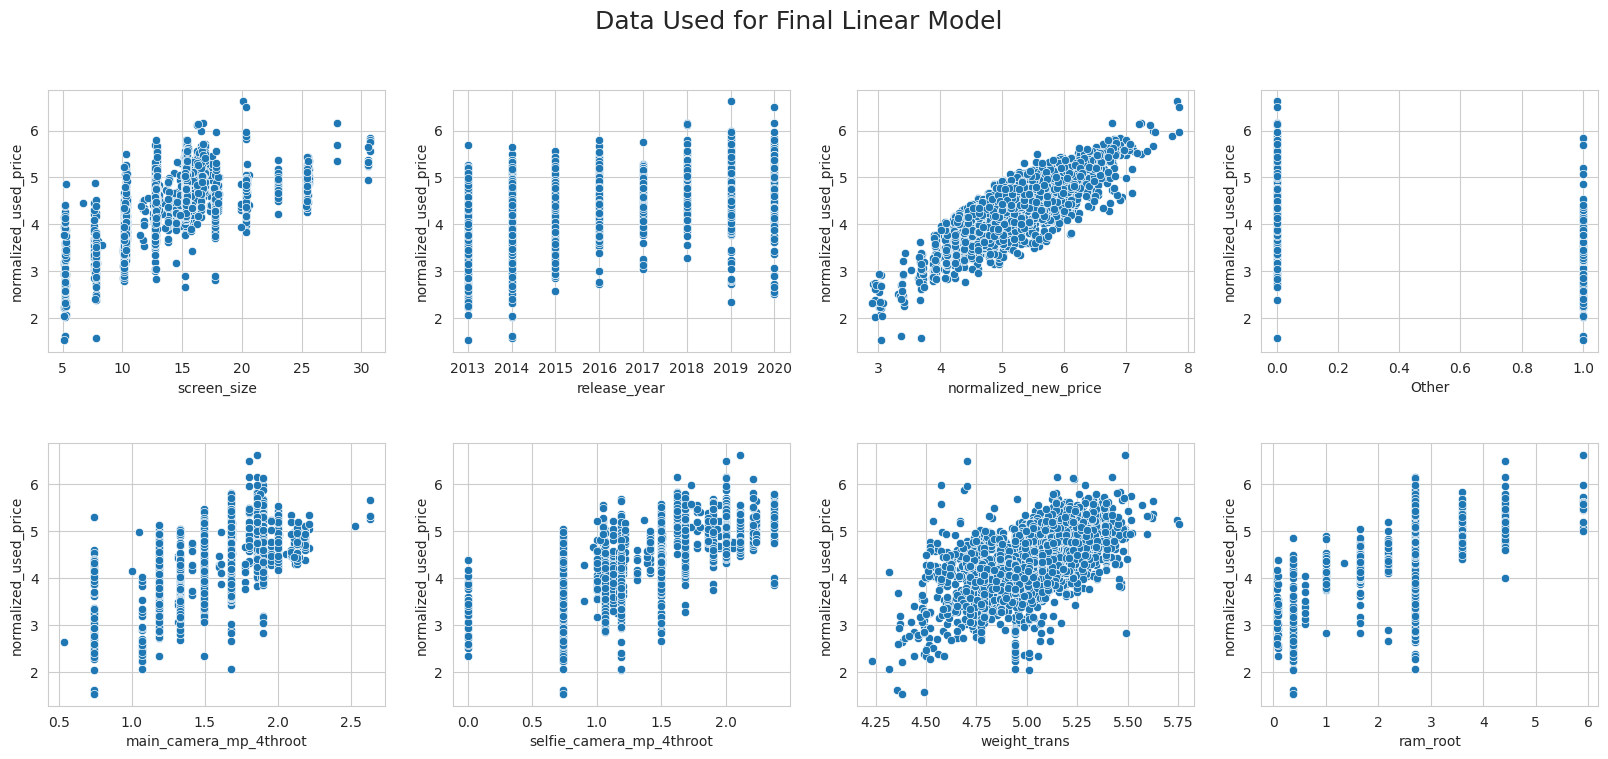

In [ ]:
#Sets up the figure
fig_scat, axs_scat = plt.subplots(2,4)

#Adjust size and spacing of the figure
fig_scat.set_figwidth(20)
fig_scat.set_figheight(8)
plt.subplots_adjust(hspace = 0.35)

#Creates each plot
sns.scatterplot(data = df_E, x = 'screen_size',    y = 'normalized_used_price', ax = axs_scat[0,0])
sns.scatterplot(data = df_E, x = 'release_year',   y = 'normalized_used_price', ax = axs_scat[0,1])
sns.scatterplot(data = df_E, x = 'normalized_new_price',    y = 'normalized_used_price', ax = axs_scat[0,2])
sns.scatterplot(data = df_E, x = 'Other',      y = 'normalized_used_price', ax = axs_scat[0,3])
sns.scatterplot(data = df_E, x = 'main_camera_mp_4throot',      y = 'normalized_used_price', ax = axs_scat[1,0])
sns.scatterplot(data = df_E, x = 'selfie_camera_mp_4throot',      y = 'normalized_used_price', ax = axs_scat[1,1])
sns.scatterplot(data = df_E, x = 'weight_trans',     y = 'normalized_used_price', ax = axs_scat[1,2])
sns.scatterplot(data = df_E, x = 'ram_root',     y = 'normalized_used_price', ax = axs_scat[1,3])

#Titles figure
fig_scat.suptitle('Data Used for Final Linear Model', fontsize = 18);

All of these plots look approximatly linear.

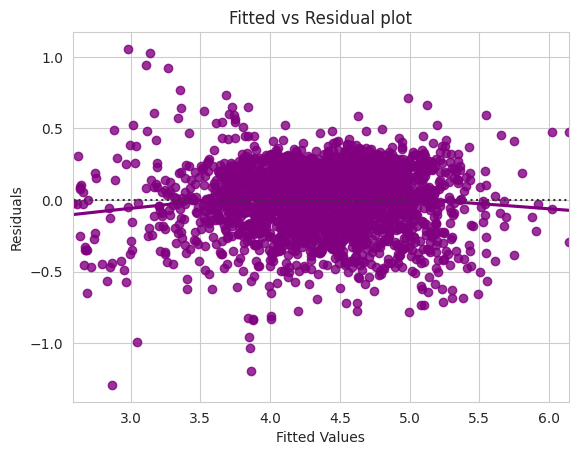

In [ ]:
# plots the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)

#Formats plot
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot");

We can see that our residuals are very close randomly distributed.

**Residuals are Normally Distributed**

We will test this by looking at a QQ-plot and running the Shapiro-Wilk test.

Text(0.5, 1.0, 'Normality of residuals')

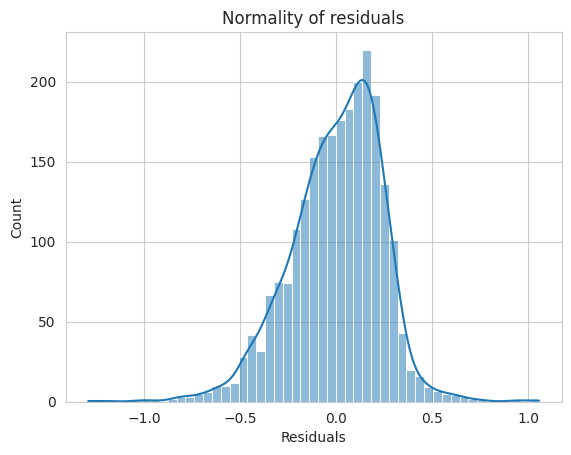

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")

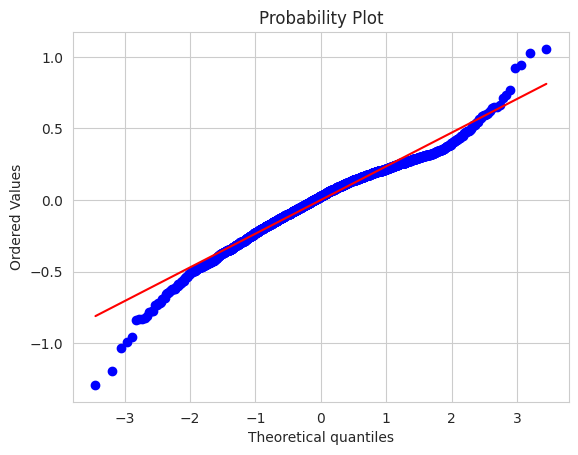

In [ ]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab);

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9763758778572083, pvalue=1.3954237080797526e-19)

Strictly speaking - the residuals are not normal. However, as an approximation, we are willing to accept this distribution as close to being normal

**Test for Homoscedasticity**

In [ ]:
#Name os statistics
name = ["F statistic", "p-value"]

#Runs test for Homoscedasticity
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)

#Prints results
lzip(name, test)

[('F statistic', 1.0866205463334928), ('p-value', 0.07520748952937187)]

Since the p-value is greater than 0.05, we can say that the residuals are homoscedastic.

## Final Model

In [ ]:
#Creates X and y with all of the data
X = df_E.drop(['normalized_used_price', 'battery', '4g', 'brand_index', 'iOS', 'int_memory_log', 'days_used', '5g', 'Windows'], axis = 1)
y = df_E.normalized_used_price

#Adds a constant to X for the intercept
X = sm.add_constant(X)

#Splits data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

linear_model_final = sm.OLS(y_train, X_train, hasconst = True)
linear_model_final = linear_model_final.fit()

print(linear_model_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1507.
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           12:33:00   Log-Likelihood:                 38.130
No. Observations:                   2417   AIC:                            -58.26
Df Residuals:                       2408   BIC:                            -6.146
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

## Actionable Insights and Recommendations

**Observations**
- Since our predicted values for our test and training data are similar, it suggests that our model is not over-trained.
- The best predictor of the normailzed used price was the normalized new price.
- The equation to estimate the normalized used price is: normalized_used+price=0.0372ram_root+0.0847weight_trans+0.1831selfie_camera_mp_4th_root+0.3024main_camera_mp_4throot+0.1215Other+0.4306normalized_new_price+0.0231release_year+0.0403screen_size-46.2863.
- The main camera mps have a stronger affect on the used price than the selfie camera.
- The normalized_new_price had the strongest corrilation with the normalized_used_price.

**Recommendations**
- If you are trying to sell the most expience used phones, focus on getting the ones with the highest new price and best main camera.
- All of the catagories had positive coefficents, so increasing any one of the variables will increase the value.  
- Our model predicts the value with a root-mean-squared-error of 0.2383 for the test data.  

In [ ]:
!jupyter nbconvert --to html SLF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2984088 bytes to SLF_Project_LearnerNotebook_FullCode.html


___